## Lab 13 - Clustering

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score,homogeneity_completeness_v_measure

[P] Copy the following code to build a very basic set of clustered data using the make_blobs function in
sklearn.datasets.samples_generator

In [7]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=60, centers=5,
cluster_std=(0.3,0.4,0.5,0.7,0.7),
center_box=(0, 8), random_state=1234)

[P] Convert your data into a single pandas data frame with three variables, "x1", "x2", and "target". The
variable "target" will represent our ground truth, i.e. the correct cluster class. Be sure it is a true
categorical variable. Show the first 5 observations, which should have two numeric variables, named "x1"
and "x2", and one category, named "target".

In [8]:
#skip some of the earlier stuff and use the df_pitching dataset instead of make blobs, 
#but maybe keep the blobs around for comparison

In [10]:
#configure df_pitching
df_pitching = pd.read_csv("../data/baseball_pitcher.csv")
float_cols_pitching = df_pitching.select_dtypes('float').columns
df_pitching[float_cols_pitching] = df_pitching[float_cols_pitching].apply(pd.to_numeric, downcast = "float")
df_pitching = df_pitching.replace("--", None)
df_pitching = df_pitching.dropna()

# Rename columns to make them easier to reference
df_pitching["Name"] = df_pitching["Player name"]
df_pitching["Pos"] = df_pitching["Position"]
df_pitching["GP"] = df_pitching["Games played"]
df_pitching["W"] = df_pitching["Win"]
df_pitching["L"] = df_pitching["Loss"]
df_pitching["ERA"] = df_pitching["Earned run Average"]
df_pitching["GS"] = df_pitching["Games Started"]
df_pitching["CG"] = df_pitching["Complete Game"]
df_pitching["STO"] = df_pitching["Shutout"]
df_pitching["SV"] = df_pitching["Save"]
df_pitching["SVO"] = df_pitching["Save Opportunity"]
df_pitching["IP"] = df_pitching["Innings pitched"]
df_pitching["H"] = df_pitching["hit"]
df_pitching["R"] = df_pitching["run"]
df_pitching["ER"] = df_pitching["earned run"]
df_pitching["HR"] = df_pitching["home run"]
df_pitching["HBP"] = df_pitching[" Hit Batsmen"]
df_pitching["BB"] = df_pitching['base on balls']
df_pitching["K"] = df_pitching['Strikeouts']

df_pitching = df_pitching.drop(columns = ['Player name', 'Position', 'Win', 'Loss', 'Earned run Average',
       'Games played', 'Games Started', 'Complete Game', 'Shutout', 'Save',
       'Save Opportunity', 'Innings pitched', 'hit', 'run', 'earned run',
       'home run', ' Hit Batsmen', 'base on balls', 'Strikeouts'])

df_pitching = df_pitching.set_index("Name")
df_pitching.index.drop_duplicates()

Index(['N Ryan', 'R Johnson', 'R Clemens', 'S Carlton', 'B Blyleven',
       'T Seaver', 'D Sutton', 'G Perry', 'G Maddux', 'P Niekro',
       ...
       'J Roa', 'E Butler', 'D Eiland', 'E Goeddel', 'B Munoz', 'J Machi',
       'B Martin', 'E Bell', 'D Ponce de Leon', 'R Hinton'],
      dtype='object', name='Name', length=1698)

<Axes: xlabel='IP', ylabel='GP'>

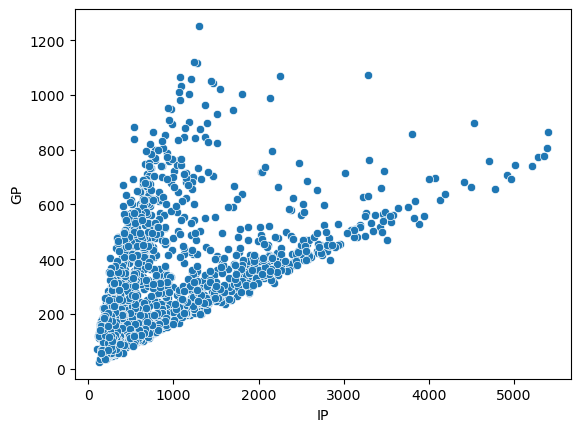

In [12]:
sns.scatterplot(x=(df_pitching.IP),y=df_pitching.GP)

In [54]:
df_bullpen = pd.concat([df_pitching.GP,df_pitching.IP], axis=1)

In [52]:
def run_kmeans(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto").fit(df)
    labels = kmeans.predict(df)
    bullpen_cluster = kmeans.transform(df)
    return labels

C:\Users\jpron\anaconda3\envs\csci349\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jpron\anaconda3\envs\csci349\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jpron\anaconda3\envs\csci349\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jpron\anaconda3\envs\csci349\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarn

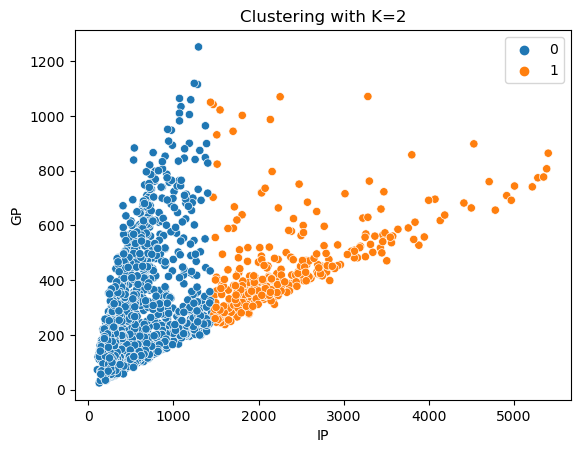

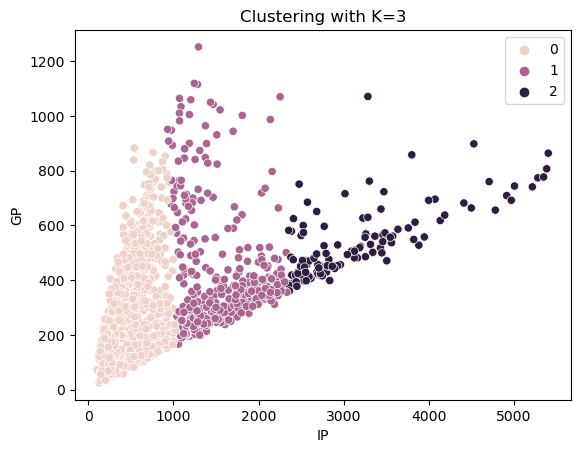

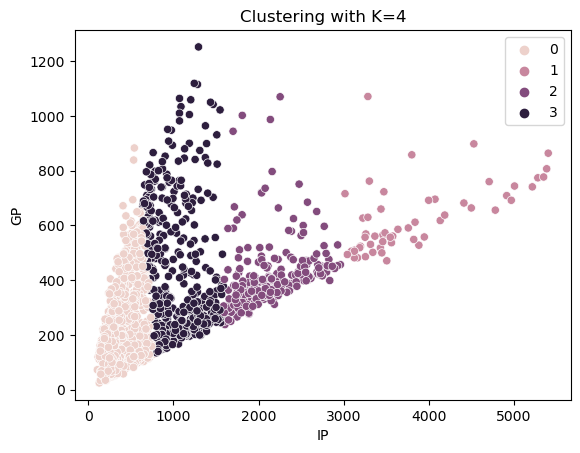

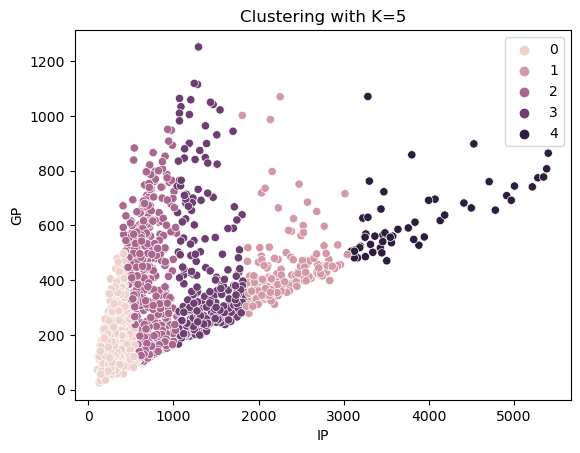

In [53]:
for i in range(2,6,1):
    labels=run_kmeans(df_bullpen,i)
    plt.figure()
    sns.scatterplot(x=df_bullpen.IP,y=df_bullpen.GP, hue=labels)
    plt.title("Clustering with K={}".format(i))